In [340]:
#Import everything, print to make sure it is proper format etc
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [341]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [342]:
img = np.load('images.npy', allow_pickle=True)
Labels= np.load('Labels.npy', allow_pickle=True)

In [343]:
import skimage
import skimage.feature
import skimage.viewer
import sys


In [344]:
def pic_edges(image):
    #https://datacarpentry.org/image-processing/08-edge-detection/
    sigma = 1.5 #2 works best
    low_threshold = 0.2 #between 0 and 1
    high_threshold = 1 #between 0 and 1


    temp=rgb2gray(image)
    edges = skimage.feature.canny(
        image=temp,
        sigma=sigma,
        low_threshold=low_threshold,
        high_threshold=high_threshold,
    )
    # display edges
    #viewer = skimage.viewer.ImageViewer(edges)
    #viewer.show()
    return edges

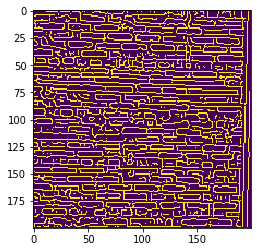

In [345]:
edges=pic_edges(img[26])
plt.imshow(edges)

2


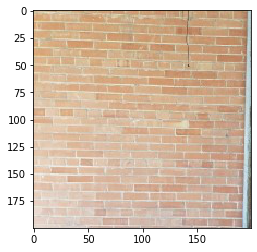

In [346]:
plt.imshow(img[26])
print(Labels[26])


41
80


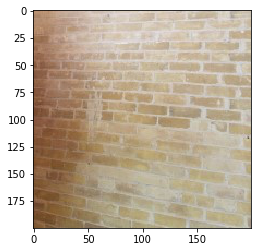

In [347]:
#Seperate training and testing
#Take data from each group at random.... 
#This dataset is only 121 points
train_d=[]
train_L=[]
test_d=[]
test_L=[]
for i in range(np.size(Labels)): #0-121
    if i%2==0: #if divisable by 5
        train_d+=[img[i]]
        train_L+=[Labels[i]]
    else:
        test_d+=[img[i]]
        test_L+=[Labels[i]]

print(np.size(train_L))
print(np.size(test_L))
plt.imshow(train_d[4])

In [348]:
#Extract Features:
#extract the lengths of the bricks
#Assuming the bricks are stretcher-horizontal (not vertical)
#Top left corner is first block of RGB data


#Using 21 bc its a good pic :)
edge_temp=pic_edges(train_d[21])
print(edge_temp)
print(np.size(edge_temp, 1))

[[False False False ... False False False]
 [False False False ...  True False False]
 [False False False ...  True False False]
 ...
 [False  True False ... False False False]
 [False False False ...  True  True False]
 [False False False ... False False False]]
200


In [349]:
def count_length(edge_temp): 
    #takes in matrix that has already run through edge detection
    #counts the number of bricks
    #finds all lengths of bricks in horizontal direction
    temp=0
    brick_count=0
    length=[]
    height=[]
    #should move accross row (so we need number of cols in row)
    for j in range(np.size(edge_temp, 1)):
        #This should move accross cols (so we need number of rows in col)
        for i in range(np.size(edge_temp, 0)):
            if edge_temp[j,i]: #true is edge, false is not
                if temp>=5:#if it is smaller than this, we assume edge detector was noisy
                    if temp<25:
                        #This is an ok assumption based off what we know about input pictures
                        length+=[temp]
                        temp=0
                        brick_count+=1
                    else: #if the length is really big (1/4 the picture), just ignore it bc that was probably 
                        #something else in the picture or a bad edge reading
                        temp=0

            else:
                #find length of this brick
                temp+=1
                #rint(length_temp)
        #Move in opposite pattern to find heights
    temp=0
    for j in range(np.size(edge_temp,0)):     
        for i in range(np.size(edge_temp, 1)):
            if edge_temp[i,j]: #true is edge, false is not
                if temp>=2:#if it is smaller than this, we assume edge detector was noisy
                    if temp<9:#based off of looking at print out, really consistantly under 5
                        #This is an ok assumption based off what we know about input pictures
                        height+=[temp]
                        temp=0
                    else: #if the length is really big (1/4 the picture), just ignore it bc that was probably 
                        #something else in the picture or a bad edge reading
                        temp=0

            else:
                #find length of this brick
                temp+=1
                #rint(length_temp)
    
    brick_count=brick_count/np.average(height)
  #print('Brick count= ', brick_count)
   #print(length)
    return brick_count, length, height

10.19288888888889
3.593525179856115
Brick count=  626.1261261261261
7228
2250


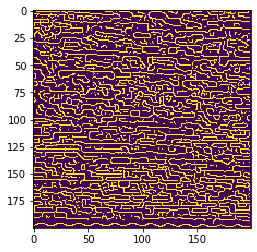

In [350]:
#stretcher example
edge_temp=pic_edges(train_d[21])
brick_count, length, height=count_length(edge_temp)
plt.imshow(edge_temp)
 #print(!edge_temp[0,9])
print(np.average(length))
print(np.average(height))
print('Brick count= ', brick_count)
print(np.size(height))
print(np.size(length))
#true brick count is about 200

10.71174863387978
4.1475831333561874
Brick count=  529.4649749969005


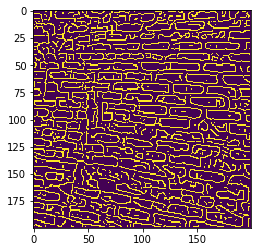

In [351]:
#english example
edge_temp=pic_edges(train_d[4])
[brick_count, length, height]=count_length(edge_temp)
plt.imshow(edge_temp)
 #print(!edge_temp[0,9])
print(np.average(length))
print(np.average(height))
print('Brick count= ', brick_count)
#true brick count is about 150

9.737704918032787
3.8263019116677652
Brick count=  669.5760186062538


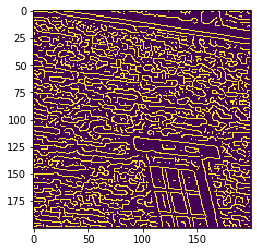

In [352]:
#flemish example
edge_temp=pic_edges(train_d[14])
[brick_count, length, height]=count_length(edge_temp)
plt.imshow(edge_temp)
 #print(!edge_temp[0,9])
print(np.average(length))
print(np.average(height))
print('Brick count= ', brick_count)

10.354895879486044
3.635640648011782
Brick count=  620.7984282589322


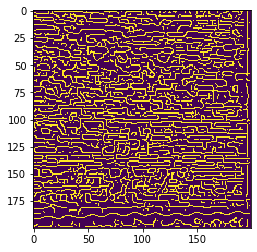

In [353]:
#Other-brick example
edge_temp=pic_edges(train_d[16])
[brick_count, length, height]=count_length(edge_temp)
plt.imshow(edge_temp)
 #print(!edge_temp[0,9])
print(np.average(length))
print(np.average(height))
print('Brick count= ', brick_count)

In [354]:
train_feat=np.zeros((4, np.size(train_L)))

for k in range(np.size(train_L)):
    edge_temp=pic_edges(train_d[k])
    [brick_count, length, height]=count_length(edge_temp)
    train_feat[0,k]=np.average(height)
    train_feat[1,k]=np.average(length)
    train_feat[2,k]=brick_count
    train_feat[3,k]=train_L[k]

test_feat=np.zeros((4, np.size(test_L)))

for k in range(np.size(test_L)):
    edge_temp=pic_edges(test_d[k])
    [brick_count, length, height]=count_length(edge_temp)
    test_feat[0,k]=np.average(height)
    test_feat[1,k]=np.average(length)
    test_feat[2,k]=brick_count
    test_feat[3,k]=test_L[k]

print(train_feat)
    
print(test_feat)

[[  3.84108815   3.80893481   4.19787045   4.05773913   4.14758313
    3.72186047   4.1042654    3.20820707   3.61871393   3.36710657
    3.16034804   3.07583774   3.53164557   3.6962442    3.82630191
    3.58416667   3.63564065   3.749146     3.76026078   3.80008704
    3.63564065   3.59352518   4.23477246   4.09265859   4.24795523
    4.30081502   4.30295511   3.77347062   4.12742981   4.22158652
    3.72227152   3.83834808   3.65307908   3.89817232   3.75562195
    3.58169482   3.64633118   3.77669012   3.83862624   3.57838983
    3.92817775]
 [ 10.60992908  10.83541267  10.65204678  10.06949627  10.71174863
   10.22111801  10.9592233   11.09516978  11.56696738  10.92746667
   11.4728493   12.06625683   9.37630792   9.90062844   9.73770492
   10.74061598  10.35489588  10.49220898  10.50468541  10.83403068
   10.35489588  10.19288889   9.45941394  10.17765363   9.38147622
    9.13212273   9.22467709   8.1244751    9.63751484  13.41219008
   10.2574048    8.60691538  10.12199313   8.7

Text(0.5, 1.0, 'Comparing average height of different classes')

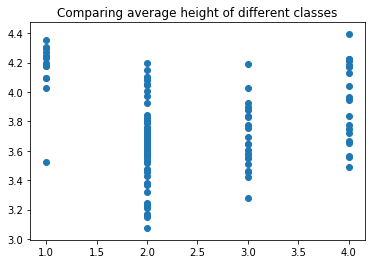

In [363]:
all_feat=np.zeros((4, np.size(Labels)))

for k in range(np.size(Labels)):
    edge_temp=pic_edges(img[k])
    [brick_count, length, height]=count_length(edge_temp)
    all_feat[0,k]=np.average(height)
    all_feat[1,k]=np.average(length)
    all_feat[2,k]=brick_count
    all_feat[3,k]=Labels[k]
    
plt.scatter(all_feat[3,:],all_feat[0,:], )
plt.title('Comparing average height of different classes')

Text(0.5, 1.0, 'Comparing average length of different classes')

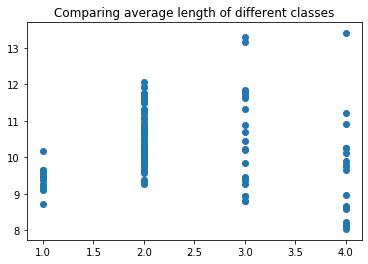

In [364]:
plt.scatter(all_feat[3,:],all_feat[1,:], )
plt.title('Comparing average length of different classes')

Text(0.5, 1.0, 'Comparing average number of bricks per picture of different classes')

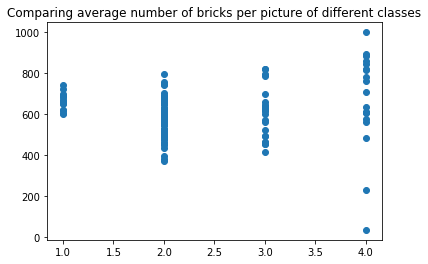

In [365]:
plt.scatter(all_feat[3,:],all_feat[2,:], )
plt.title('Comparing average number of bricks per picture of different classes')

Text(0, 0.5, 'Width in Pixels')

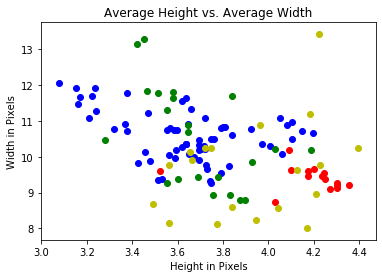

In [358]:

for k in range(np.size(Labels)):
    if Labels[k]==1:
        plt.scatter(all_feat[0,k], all_feat[1,k], c='r') #Flemish
    if Labels[k]==2:
        plt.scatter(all_feat[0,k], all_feat[1,k], c='b') #English
    if Labels[k]==3:
        plt.scatter(all_feat[0,k], all_feat[1,k], c='g') #Stretcher
    if Labels[k]==4:
        plt.scatter(all_feat[0,k], all_feat[1,k], c='y') #Other brick
plt.title('Average Height vs. Average Width')
plt.xlabel('Height in Pixels')
plt.ylabel('Width in Pixels')

Text(0, 0.5, 'Width in Pixels')

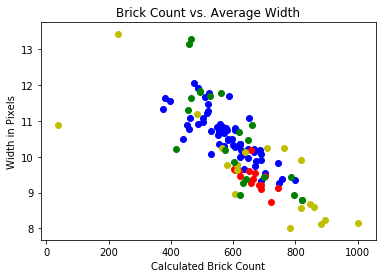

In [359]:
for k in range(np.size(Labels)):
    if Labels[k]==1:
        plt.scatter(all_feat[2,k], all_feat[1,k], c='r') #Flemish
    if Labels[k]==2:
        plt.scatter(all_feat[2,k], all_feat[1,k], c='b')#English
    if Labels[k]==3:
        plt.scatter(all_feat[2,k], all_feat[1,k], c='g') #Stretcher
    if Labels[k]==4:
        plt.scatter(all_feat[2,k], all_feat[1,k], c='y') #Other brick
plt.title('Brick Count vs. Average Width')
plt.xlabel('Calculated Brick Count')
plt.ylabel('Width in Pixels')
#plt.legend(['Red', 'Blue', 'Green', 'Yellow'])

Text(0, 0.5, 'Height in Pixels')

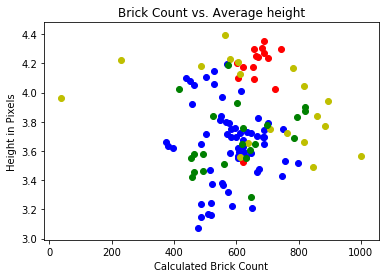

In [360]:
for k in range(np.size(Labels)):
    if Labels[k]==1:
        plt.scatter(all_feat[2,k], all_feat[0,k], c='r') #Flemish
    if Labels[k]==2:
        plt.scatter(all_feat[2,k], all_feat[0,k], c='b')#English
    if Labels[k]==3:
        plt.scatter(all_feat[2,k], all_feat[0,k], c='g') #Stretcher
    if Labels[k]==4:
        plt.scatter(all_feat[2,k], all_feat[0,k], c='y') #Other brick
plt.title('Brick Count vs. Average height')
plt.xlabel('Calculated Brick Count')
plt.ylabel('Height in Pixels')
#plt.legend(['Red', 'Blue', 'Green', 'Yellow'])

In [ ]:
## put probabilities together:
####                | average heights of corresponsding image |
####                | average lengths of corresponding image  |
#### feature matrix=|   calculated brick count of image       |
####                |              truth data                 |
#test_feat
#train_feat
C1_h=[]
C1_l=[]
C1_b=[]

C2_h=[]
C2_l=[]
C2_b=[]

C3_h=[]
C3_l=[]
C3_b=[]

C4_h=[]
C4_l=[]
C4_b=[]

for k in range(np.size(train_L)):
    if train_feat[3,k]==1:
        C1_h+=[train_feat[0,k]]
        C1_l+=[train_feat[1,k]]
        C1_b+=[train_feat[2,k]]
    elif train_feat[3,k]==2:
        C2_h+=[train_feat[0,k]]
        C2_l+=[train_feat[1,k]]
        C2_b+=[train_feat[2,k]]
    elif train_feat[3,k]==3:
        C3_h+=[train_feat[0,k]]
        C3_l+=[train_feat[1,k]]
        C3_b+=[train_feat[2,k]]
    elif train_feat[3,k]==4:
        C4_h+=[train_feat[0,k]]
        C4_l+=[train_feat[1,k]]
        C4_b+=[train_feat[2,k]] 

In [ ]:
##This is just for the report / to prove that it is guassian
C1h=[]
C1l=[]
C1b=[]

C2h=[]
C2l=[]
C2b=[]

C3h=[]
C3l=[]
C3b=[]

C4h=[]
C4l=[]
C4b=[]

for k in range(np.size(Labels)):
    if all_feat[3,k]==1:
        C1h+=[all_feat[0,k]]
        C1l+=[all_feat[1,k]]
        C1b+=[all_feat[2,k]]
    elif all_feat[3,k]==2:
        C2h+=[all_feat[0,k]]
        C2l+=[all_feat[1,k]]
        C2b+=[all_feat[2,k]]
    elif all_feat[3,k]==3:
        C3h+=[all_feat[0,k]]
        C3l+=[all_feat[1,k]]
        C3b+=[all_feat[2,k]]
    elif all_feat[3,k]==4:
        C4h+=[all_feat[0,k]]
        C4l+=[all_feat[1,k]]
        C4b+=[all_feat[2,k]] 

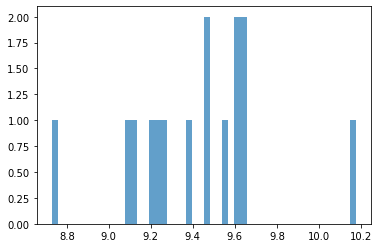

In [404]:
plt.hist(C1l,bins=50,alpha=0.7);

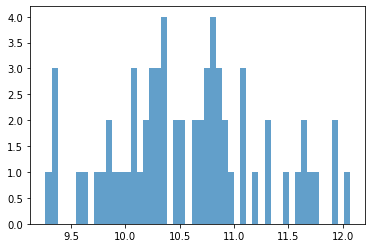

In [403]:
plt.hist(C2l,bins=50,alpha=0.7);


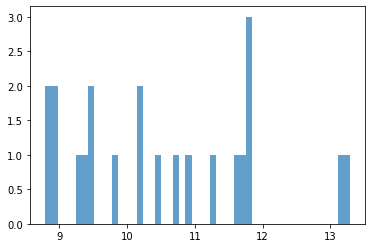

In [402]:
plt.hist(C3l,bins=50,alpha=0.7);


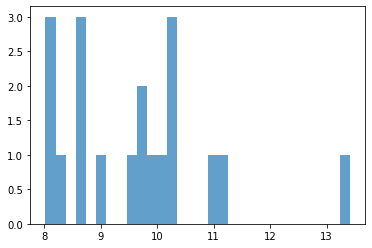

In [405]:
plt.hist(C4l,bins=30,alpha=0.7);

In [361]:
# Finding the mu's and sigmas
C1_mu_H=np.average(C1_h)
C1_mu_L=np.average(C1_l)
C1_mu_B=np.average(C1_b)

C2_mu_H=np.average(C2_h)
C2_mu_L=np.average(C2_l)
C2_mu_B=np.average(C2_b)

C3_mu_H=np.average(C3_h)
C3_mu_L=np.average(C3_l)
C3_mu_B=np.average(C3_b)

C4_mu_H=np.average(C4_h)
C4_mu_L=np.average(C4_l)
C4_mu_B=np.average(C4_b)


C1_var_h=0
C1_var_l=0
C1_var_b=0
#could make this a function, but I'm not going to bc this will run faster :)
for k in range(np.size(C1_h)): #should all be the same length within a class
    C1_var_h+=(C1_h[k]-C1_mu_H)**2
    C1_var_l+=(C1_l[k]-C1_mu_L)**2
    C1_var_b+=(C1_b[k]-C1_mu_B)**2

C1_var_h=np.sqrt(C1_var_h/np.size(C1_h))
C1_var_l=np.sqrt(C1_var_l/np.size(C1_h))
C1_var_b=np.sqrt(C1_var_b/np.size(C1_h))
print('Class 1')
print(C1_var_h)
print(C1_var_l)
print(C1_var_b)



    
C2_var_h=0
C2_var_l=0
C2_var_b=0

for k in range(np.size(C2_h)): #should all be the same length within a class
    C2_var_h+=(C2_h[k]-C2_mu_H)**2
    C2_var_l+=(C2_l[k]-C2_mu_L)**2
    C2_var_b+=(C2_b[k]-C2_mu_B)**2

C2_var_h=np.sqrt(C2_var_h/np.size(C2_h))
C2_var_l=np.sqrt(C2_var_l/np.size(C2_h))
C2_var_b=np.sqrt(C2_var_b/np.size(C2_h))
print('Class 2')
print(C2_var_h)
print(C2_var_l)
print(C2_var_b)


C3_var_h=0
C3_var_l=0
C3_var_b=0

#could make this a function, but I'm not going to bc this will run faster :)
for k in range(np.size(C3_h)): #should all be the same length within a class
    C3_var_h+=(C3_h[k]-C3_mu_H)**2
    C3_var_l+=(C3_l[k]-C3_mu_L)**2
    C3_var_b+=(C3_b[k]-C3_mu_B)**2

C3_var_h=np.sqrt(C3_var_h/np.size(C3_h))
C3_var_l=np.sqrt(C3_var_l/np.size(C3_h))
C3_var_b=np.sqrt(C3_var_b/np.size(C3_h))
print('Class 3')
print(C3_var_h)
print(C3_var_l)
print(C3_var_b)


C4_var_h=0
C4_var_l=0
C4_var_b=0
#could make this a function, but I'm not going to bc this will run faster :)
for k in range(np.size(C4_h)): #should all be the same length within a class
    C4_var_h+=(C4_h[k]-C4_mu_H)**2
    C4_var_l+=(C4_l[k]-C4_mu_L)**2
    C4_var_b+=(C4_b[k]-C4_mu_B)**2

C4_var_h=np.sqrt(C4_var_h/np.size(C4_h))
C4_var_l=np.sqrt(C4_var_l/np.size(C4_h))
C4_var_b=np.sqrt(C4_var_b/np.size(C4_h))
print('Class 4')
print(C4_var_h)
print(C4_var_l)
print(C4_var_b)

Class 1
0.0766485814808936
0.3695776251269617
30.964295767886973
Class 2
0.2940204910092594
0.6001848767172717
76.50005028598171
Class 3
0.12787841842193887
1.1794217901917603
108.34957904226701
Class 4
0.2108836525430403
1.698507265329198
219.1462757678312
